In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import np_utils

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [3]:
model = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=256, verbose=0)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss:.4f} | Accuracy: {accuracy:.4f}")

Loss: 0.0695 | Accuracy: 0.9777


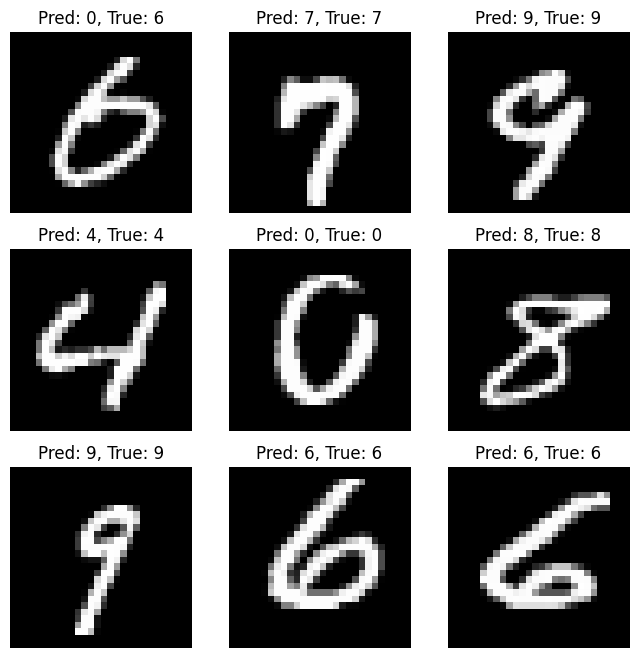

In [4]:
y_pred = model.predict(X_test, verbose=0)
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
axs = axs.flatten()
for i in range(9):
    idx = np.random.randint(0, X_test.shape[0])
    img = X_test[idx].reshape(28, 28)
    axs[i].imshow(img, cmap='gray')
    pred_label = np.argmax(y_pred[idx])
    true_label = np.argmax(y_test[idx])
    axs[i].set_title(f'Pred: {pred_label}, True: {true_label}')
    axs[i].axis('off')
plt.show()